In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.defs.Ejercicio_1 as ej1 #Contiene la funcion histograma
import ipynb.fs.defs.Ejercicio_2 as ej2 #Contiene la funcion expan

imagen = cv.imread('imgpack/Monobanda/2_Corsica.jpg',cv.IMREAD_GRAYSCALE)

In [2]:
def histograma(img):
    hist = {i:0 for i in range(0,256)}
    for l in img:
        for x in l:
            hist[x] = hist[x]+1
    return list(hist.values())

In [3]:
def corte(img, porc):
    
    resimg = img.copy()
    h = histograma(img)
    s = img.size
    p = int(s*porc)
    cmin = 0
    cmax = 255
    
    for x in range(0,len(h)):
        while(p > 0 and h[x]>0):
            h[x] = h[x]-1
            p = p-1
            cmin = x
            
    for x in range(len(h)-1,0,-1):
        while(p > 0 and h[x]>0):
            h[x] = h[x]-1
            p = p-1
            cmax = x
            
    resimg = ej2.expan(resimg,cmin,cmax)
    return resimg

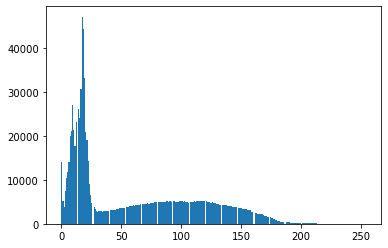

In [4]:
img_exp = corte(imagen,0.01)
plt.hist(img_exp.ravel(),255,[0,254],width=1);plt.show()

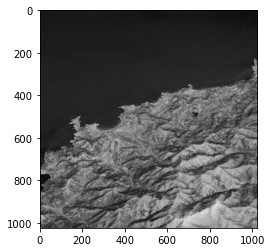

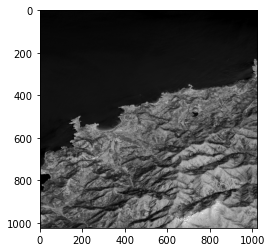

In [5]:
plt.figure(1)
plt.imshow(imagen, cmap='gray')

plt.figure(2)
plt.imshow(img_exp,cmap='gray')